<a href="https://colab.research.google.com/github/rdwn354/Tensorflow_doc/blob/main/NLP/Conv1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("imdb_reviews/subwords8k", with_info = True, as_supervised = True)

tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9ZVU7B/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9ZVU7B/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9ZVU7B/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test']
train_datasets = train_data.shuffle(BUFFER_SIZE)

train_datasets = train_datasets.padded_batch(BATCH_SIZE)
test_datasets = test_data.padded_batch(BATCH_SIZE)

In [3]:
import tensorflow as tf
import numpy as np

# Hyperparameters
batch_size = 1
timesteps = 20
features = 20
filters = 128
kernel_size = 5

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'filters: {filters}')
print(f'kernel_size: {kernel_size}')

random_input = np.random.rand(batch_size, timesteps, features)
print(f'shape of input array: {random_input.shape}')

conv1d = tf.keras.layers.Conv1D(kernel_size=kernel_size, filters=filters, activation = 'relu')
result = conv1d(random_input)
print(f'shape of conv1d output: {result.shape}')

gmp = tf.keras.layers.GlobalMaxPooling1D()
result = gmp(result)
print(f'shape of global max pooling output: {result.shape}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 20
filters: 128
kernel_size: 5
shape of input array: (1, 20, 20)
shape of conv1d output: (1, 16, 128)
shape of global max pooling output: (1, 128)


In [4]:
# Hyperparameters
embedding_dim = 64
filters = 128
kernel_size = 5
dense_dim = 64

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters = filters, kernel_size = kernel_size, activation = 'relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573249 (2.19 MB)
Trainable params: 573249 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [5]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(train_datasets, epochs=NUM_EPOCHS, validation_data=test_datasets)

Epoch 1/10
98/98 [==============================] - 80s 784ms/step - loss: 0.6038 - accuracy: 0.6884 - val_loss: 0.3886 - val_accuracy: 0.8286
Epoch 2/10
98/98 [==============================] - 30s 302ms/step - loss: 0.2796 - accuracy: 0.8847 - val_loss: 0.2603 - val_accuracy: 0.8920
Epoch 3/10
98/98 [==============================] - 22s 227ms/step - loss: 0.1421 - accuracy: 0.9514 - val_loss: 0.2588 - val_accuracy: 0.8938
Epoch 4/10
98/98 [==============================] - 19s 191ms/step - loss: 0.0598 - accuracy: 0.9868 - val_loss: 0.2860 - val_accuracy: 0.8937
Epoch 5/10
98/98 [==============================] - 16s 159ms/step - loss: 0.0190 - accuracy: 0.9984 - val_loss: 0.3144 - val_accuracy: 0.8947
Epoch 6/10
98/98 [==============================] - 14s 140ms/step - loss: 0.0069 - accuracy: 0.9998 - val_loss: 0.3273 - val_accuracy: 0.8963
Epoch 7/10
98/98 [==============================] - 13s 135ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.3454 - val_accuracy: 0.8957

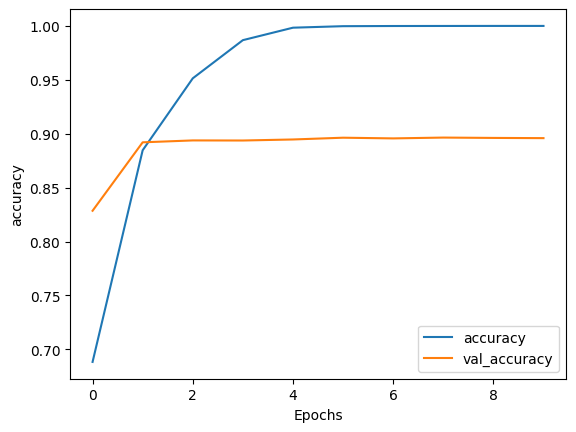

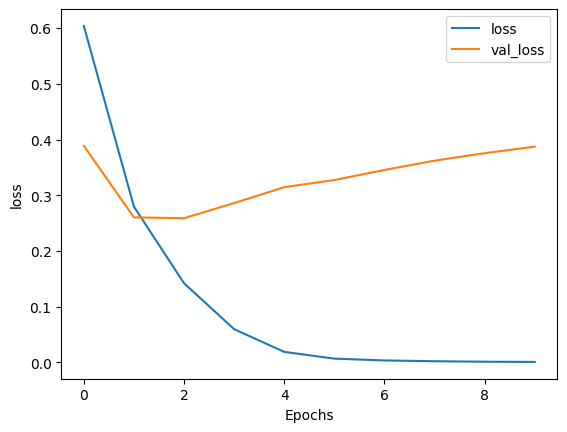

In [7]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")